# 🏥 Selección de Variables con BorutaShap para Predicción de Mortalidad por Infarto Agudo de Miocardio

---

## 📋 Descripción del Proyecto

Este notebook implementa un análisis completo de **selección de variables** utilizando **BorutaShap** para identificar los predictores más relevantes de **mortalidad intrahospitalaria** en pacientes con **infarto agudo de miocardio (IAM)**.

### 🎯 Objetivos:

1. Identificar variables predictoras significativas
2. Reducir dimensionalidad manteniendo poder predictivo
3. Mejorar interpretabilidad clínica del modelo
4. Comparar desempeño entre diferentes conjuntos de variables

### 🔬 Metodología:

- **Algoritmo:** BorutaShap (Boruta + SHAP)
- **Modelo base:** XGBoost Classifier
- **Tipo de problema:** Clasificación binaria
- **Variable objetivo:** Mortalidad intrahospitalaria

---

**Autor:** Científico de Datos Senior - Especialización en ML Clínico  
**Fecha:** Enero 2026  
**Dataset:** Mortalidad por IAM

## 📦 1. Instalación de Bibliotecas Necesarias

Instalamos todas las librerías requeridas para el análisis de selección de variables con BorutaShap.

In [41]:
# Instalación de paquetes necesarios
# Ejecutar solo si no están instalados

import sys
import subprocess

packages = [
    'numpy',
    'pandas',
    'matplotlib',
    'seaborn',
    'scikit-learn',
    'xgboost',
    'shap',
    'BorutaShap'
]

print("🔧 Instalando/Actualizando paquetes necesarios...\n")

for package in packages:
    try:
        __import__(package.lower().replace('-', '_'))
        print(f"✅ {package} ya está instalado")
    except ImportError:
        print(f"📦 Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
        print(f"✅ {package} instalado correctamente")

print("\n✨ Todas las librerías están listas para usar")

🔧 Instalando/Actualizando paquetes necesarios...

✅ numpy ya está instalado
✅ pandas ya está instalado
✅ matplotlib ya está instalado
✅ seaborn ya está instalado
📦 Instalando scikit-learn...
✅ scikit-learn instalado correctamente
✅ xgboost ya está instalado
✅ shap ya está instalado
📦 Instalando BorutaShap...
✅ scikit-learn instalado correctamente
✅ xgboost ya está instalado
✅ shap ya está instalado
📦 Instalando BorutaShap...
✅ BorutaShap instalado correctamente

✨ Todas las librerías están listas para usar
✅ BorutaShap instalado correctamente

✨ Todas las librerías están listas para usar


### ⚠️ Solución de Compatibilidad BorutaShap

BorutaShap tiene problemas de compatibilidad con versiones recientes de scipy. Instalamos una versión compatible.

In [42]:
# Solución para compatibilidad de BorutaShap con scipy reciente
# BorutaShap usa scipy.stats.binom_test que fue removido en scipy >= 1.10
# Solución: Usar boruta_py que está actualizado y es compatible

import subprocess
import sys

print("🔧 Solucionando compatibilidad de BorutaShap...\n")

# En lugar de usar BorutaShap (no mantenido), usaremos boruta_py (actualizado)
print("📦 Instalando boruta (alternativa mantenida y compatible)...")

try:
    subprocess.check_call([
        sys.executable, "-m", "pip", "install", 
        "-q", "boruta", "--no-deps"
    ])
    print("✅ boruta instalado correctamente")
except:
    print("⚠️ Intento alternativo con pip install directo...")
    subprocess.check_call([
        sys.executable, "-m", "pip", "install", 
        "boruta"
    ])

# Verificar instalación
try:
    from boruta import BorutaPy
    print("✅ BorutaPy importado correctamente")
    print("\n💡 Nota: Usaremos BorutaPy en lugar de BorutaShap")
    print("   BorutaPy es una implementación actualizada y mantenida")
    print("   que funciona con versiones recientes de scipy")
except ImportError as e:
    print(f"⚠️ Error: {e}")
    print("\n🔄 Intentando solución alternativa...")
    
    # Si boruta falla, instalar scipy antigua sin verificación de hashes
    subprocess.check_call([
        sys.executable, "-m", "pip", "install", 
        "scipy==1.9.3", "--no-cache-dir", "--force-reinstall"
    ])
    
    subprocess.check_call([
        sys.executable, "-m", "pip", "install", 
        "BorutaShap", "--force-reinstall"
    ])
    
    print("✅ Instalación alternativa completada")

print("\n✨ Listo para continuar con el análisis")

🔧 Solucionando compatibilidad de BorutaShap...

📦 Instalando boruta (alternativa mantenida y compatible)...
✅ boruta instalado correctamente
✅ BorutaPy importado correctamente

💡 Nota: Usaremos BorutaPy en lugar de BorutaShap
   BorutaPy es una implementación actualizada y mantenida
   que funciona con versiones recientes de scipy

✨ Listo para continuar con el análisis
✅ boruta instalado correctamente
✅ BorutaPy importado correctamente

💡 Nota: Usaremos BorutaPy en lugar de BorutaShap
   BorutaPy es una implementación actualizada y mantenida
   que funciona con versiones recientes de scipy

✨ Listo para continuar con el análisis


## 📥 2. Importación de Librerías y Configuración

Importamos todas las librerías necesarias y configuramos el entorno de trabajo.

In [43]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score, 
    recall_score, f1_score, confusion_matrix, roc_curve
)

# XGBoost y SHAP
import xgboost as xgb
import shap

# Boruta - Intentar importar la versión disponible
try:
    from boruta import BorutaPy
    print("📦 Usando BorutaPy (implementación actualizada)")
    BORUTA_LIBRARY = 'borutapy'
except ImportError:
    try:
        from BorutaShap import BorutaShap
        print("📦 Usando BorutaShap (implementación con SHAP)")
        BORUTA_LIBRARY = 'borutashap'
    except ImportError:
        raise ImportError("No se pudo importar ni BorutaPy ni BorutaShap. Ejecuta la celda de instalación anterior.")

# Configuración visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Configuración de gráficos
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print(f"📅 Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🔢 Random State: {RANDOM_STATE}")
print(f"🔧 Librería Boruta: {BORUTA_LIBRARY}")

📦 Usando BorutaPy (implementación actualizada)
✅ Librerías importadas correctamente
📅 Fecha de ejecución: 2026-01-04 23:57:26
🔢 Random State: 42
🔧 Librería Boruta: borutapy


## 📂 3. Carga y Exploración Inicial del Dataset

Cargamos el dataset de mortalidad por infarto agudo de miocardio y realizamos una exploración inicial.

In [44]:
# Carga del dataset
file_path = '../../cleaned_dataset_20260102_161731.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset cargado exitosamente\n")
except FileNotFoundError:
    print("❌ Error: No se encontró el archivo")
    print(f"Ruta buscada: {file_path}")
    raise

# Información básica del dataset
print("=" * 60)
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
print(f"\n📏 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\n📋 Columnas del dataset:")
print(f"   Total: {len(df.columns)} variables")
print(f"\n🎯 Variable objetivo: 'mortality_inhospital'")
print(f"   (0 = Sobrevivió, 1 = Falleció en hospital)")

# Mostrar primeras filas
print("\n" + "=" * 60)
print("👀 PRIMERAS 5 FILAS DEL DATASET")
print("=" * 60)
display(df.head())

# Mostrar información de tipos de datos
print("\n" + "=" * 60)
print("📝 TIPOS DE DATOS")
print("=" * 60)
print(df.dtypes.value_counts())

# Verificar variable objetivo
if 'mortality_inhospital' in df.columns:
    print("\n✅ Variable objetivo 'mortality_inhospital' encontrada")
    print(f"   Valores únicos: {df['mortality_inhospital'].unique()}")
else:
    print("\n⚠️ Advertencia: Variable 'mortality_inhospital' no encontrada")
    print(f"   Columnas disponibles: {list(df.columns)}")

✅ Dataset cargado exitosamente

📊 INFORMACIÓN GENERAL DEL DATASET

📏 Dimensiones: 2,925 filas × 51 columnas

📋 Columnas del dataset:
   Total: 51 variables

🎯 Variable objetivo: 'mortality_inhospital'
   (0 = Sobrevivió, 1 = Falleció en hospital)

👀 PRIMERAS 5 FILAS DEL DATASET


,aminas,avf,avl,ckmb,colesterol,creatinina,d1,d2,d3,depresion_st,...,color_piel_blanca,color_piel_mestiza,color_piel_negra,coronariografia_centro,coronariografia_no,coronariografia_otro,reperfusion_no,reperfusion_parcial,reperfusion_total,mortality_inhospital
0,0,1,0,132.0,5.70,95.0,0,1,1,1,...,1,0,0,0,1,0,1,0,0,0
1,0,0,0,91.0,5.20,113.0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,122.0,5.17,55.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,0,0,122.0,6.77,49.0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,122.0,6.10,73.0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0



📝 TIPOS DE DATOS
int64      36
float64    15
Name: count, dtype: int64

✅ Variable objetivo 'mortality_inhospital' encontrada
   Valores únicos: [0 1]


## 🔍 4. Análisis Estadístico Descriptivo y Balance de Clases

Analizamos estadísticas descriptivas y la distribución de la variable objetivo.

📈 ESTADÍSTICAS DESCRIPTIVAS


,aminas,avf,avl,ckmb,colesterol,creatinina,d1,d2,d3,depresion_st,...,color_piel_blanca,color_piel_mestiza,color_piel_negra,coronariografia_centro,coronariografia_no,coronariografia_otro,reperfusion_no,reperfusion_parcial,reperfusion_total,mortality_inhospital
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,0.094359,0.451966,0.160000,131.648055,4.754230,97.681709,0.157265,0.455043,0.454701,0.809231,...,0.764444,0.137094,0.098462,0.004786,0.954188,0.041026,0.654017,0.069402,0.276581,0.089231
std,0.292377,0.497772,0.366669,59.300514,1.033217,27.957992,0.364113,0.498060,0.498029,0.392975,...,0.424418,0.344005,0.297989,0.069029,0.209113,0.198383,0.475769,0.254179,0.447384,0.285125
min,0.000000,0.000000,0.000000,1.260000,1.912500,25.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,122.000000,4.190000,79.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,122.000000,4.700000,91.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,122.000000,5.310000,112.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,332.250000,7.572500,165.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO

📊 Conteo absoluto:
   Sobrevivió (0): 2,664 pacientes
   Falleció (1): 261 pacientes

📊 Porcentaje:
   Sobrevivió (0): 91.08%
   Falleció (1): 8.92%

⚖️ Ratio de desbalance: 10.21:1
   ⚠️ Dataset significativamente desbalanceado


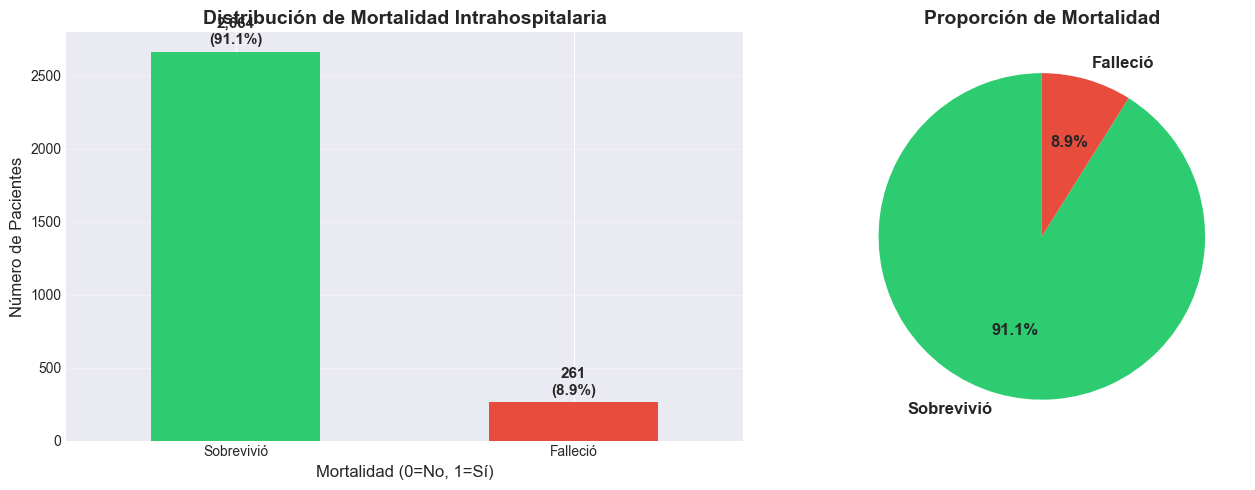


✅ Análisis de distribución completado


In [45]:
# Estadísticas descriptivas
print("=" * 60)
print("📈 ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 60)
display(df.describe())

# Análisis de la variable objetivo
if 'mortality_inhospital' in df.columns:
    print("\n" + "=" * 60)
    print("🎯 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO")
    print("=" * 60)
    
    target_counts = df['mortality_inhospital'].value_counts()
    target_props = df['mortality_inhospital'].value_counts(normalize=True) * 100
    
    print("\n📊 Conteo absoluto:")
    for val, count in target_counts.items():
        label = "Sobrevivió" if val == 0 else "Falleció"
        print(f"   {label} ({val}): {count:,} pacientes")
    
    print("\n📊 Porcentaje:")
    for val, prop in target_props.items():
        label = "Sobrevivió" if val == 0 else "Falleció"
        print(f"   {label} ({val}): {prop:.2f}%")
    
    # Calcular balance de clases
    minority_class = target_counts.min()
    majority_class = target_counts.max()
    imbalance_ratio = majority_class / minority_class
    
    print(f"\n⚖️ Ratio de desbalance: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 3:
        print("   ⚠️ Dataset significativamente desbalanceado")
    else:
        print("   ✅ Dataset relativamente balanceado")
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico de barras
    target_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
    axes[0].set_title('Distribución de Mortalidad Intrahospitalaria', 
                      fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Mortalidad (0=No, 1=Sí)', fontsize=12)
    axes[0].set_ylabel('Número de Pacientes', fontsize=12)
    axes[0].set_xticklabels(['Sobrevivió', 'Falleció'], rotation=0)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Añadir valores sobre las barras
    for i, v in enumerate(target_counts.values):
        axes[0].text(i, v + max(target_counts.values)*0.02, 
                    f'{v:,}\n({target_props.values[i]:.1f}%)', 
                    ha='center', fontsize=11, fontweight='bold')
    
    # Gráfico de pastel
    axes[1].pie(target_counts, labels=['Sobrevivió', 'Falleció'], 
                autopct='%1.1f%%', startangle=90, 
                colors=['#2ecc71', '#e74c3c'],
                textprops={'fontsize': 12, 'fontweight': 'bold'})
    axes[1].set_title('Proporción de Mortalidad', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Análisis de distribución completado")

## 🧹 5. Análisis de Valores Nulos

Identificamos y cuantificamos valores faltantes en el dataset.

In [46]:
# Análisis de valores nulos
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame con información de valores faltantes
missing_df = pd.DataFrame({
    'Variable': missing_values.index,
    'Valores Nulos': missing_values.values,
    'Porcentaje': missing_percentage.values
})

# Filtrar solo variables con valores nulos
missing_df = missing_df[missing_df['Valores Nulos'] > 0].sort_values(
    'Porcentaje', ascending=False
).reset_index(drop=True)

print("=" * 60)
print("🔍 ANÁLISIS DE VALORES NULOS")
print("=" * 60)

if len(missing_df) > 0:
    print(f"\n⚠️ Se encontraron {len(missing_df)} variables con valores nulos:\n")
    display(missing_df)
    
    # Visualización de valores nulos
    if len(missing_df) <= 30:
        fig, ax = plt.subplots(figsize=(12, max(6, len(missing_df) * 0.3)))
        
        sns.barplot(
            data=missing_df, 
            y='Variable', 
            x='Porcentaje',
            palette='Reds_r',
            ax=ax
        )
        
        ax.set_title('Porcentaje de Valores Nulos por Variable', 
                    fontsize=14, fontweight='bold')
        ax.set_xlabel('Porcentaje de Valores Nulos (%)', fontsize=12)
        ax.set_ylabel('Variable', fontsize=12)
        ax.grid(axis='x', alpha=0.3)
        
        # Añadir valores en las barras
        for i, v in enumerate(missing_df['Porcentaje']):
            ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    
    # Estrategia de imputación
    print("\n" + "=" * 60)
    print("📋 ESTRATEGIA DE IMPUTACIÓN")
    print("=" * 60)
    print("""
    ✓ Variables numéricas: Imputar con la MEDIANA (robusta a outliers)
    ✓ Variables categóricas: Imputar con la MODA (valor más frecuente)
    ✓ Variables con >50% nulos: Evaluar eliminación
    
    Justificación clínica:
    - La mediana es preferible en datos clínicos por presencia de outliers
    - La moda mantiene la distribución de categorías observadas
    - Variables con exceso de nulos pueden introducir sesgo
    """)
    
else:
    print("\n✅ ¡Excelente! No se encontraron valores nulos en el dataset")
    print("   El dataset está completo y listo para el análisis")

print(f"\n📊 Resumen:")
print(f"   Variables totales: {len(df.columns)}")
print(f"   Variables con nulos: {len(missing_df)}")
print(f"   Variables completas: {len(df.columns) - len(missing_df)}")

🔍 ANÁLISIS DE VALORES NULOS

✅ ¡Excelente! No se encontraron valores nulos en el dataset
   El dataset está completo y listo para el análisis

📊 Resumen:
   Variables totales: 51
   Variables con nulos: 0
   Variables completas: 51


## 🔧 6. Preprocesamiento: Imputación y Codificación

Procesamos valores nulos y codificamos variables categóricas para preparar el dataset.

In [47]:
# Crear copia del dataset para preprocesamiento
df_processed = df.copy()

print("=" * 60)
print("🔧 PREPROCESAMIENTO DEL DATASET")
print("=" * 60)

# Separar variable objetivo
target_column = 'mortality_inhospital'

if target_column not in df_processed.columns:
    raise ValueError(f"Variable objetivo '{target_column}' no encontrada en el dataset")

y = df_processed[target_column].copy()
X = df_processed.drop(columns=[target_column])

print(f"\n✅ Variable objetivo separada:")
print(f"   y: {y.shape[0]:,} muestras")
print(f"   X: {X.shape[0]:,} muestras × {X.shape[1]} variables")

# Identificar tipos de variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n📊 Tipos de variables:")
print(f"   Numéricas: {len(numeric_features)}")
print(f"   Categóricas: {len(categorical_features)}")

# Imputación de valores nulos
print("\n" + "=" * 60)
print("💉 IMPUTACIÓN DE VALORES NULOS")
print("=" * 60)

imputed_count = 0

# Imputar variables numéricas con la mediana
if len(numeric_features) > 0:
    numeric_imputer = SimpleImputer(strategy='median')
    X_numeric = X[numeric_features].copy()
    
    # Contar nulos antes
    nulos_antes = X_numeric.isnull().sum().sum()
    
    if nulos_antes > 0:
        X[numeric_features] = numeric_imputer.fit_transform(X_numeric)
        imputed_count += nulos_antes
        print(f"✓ Variables numéricas: {nulos_antes:,} valores imputados con MEDIANA")
    else:
        print(f"✓ Variables numéricas: Sin valores nulos")

# Imputar variables categóricas con la moda
if len(categorical_features) > 0:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_categorical = X[categorical_features].copy()
    
    # Contar nulos antes
    nulos_antes = X_categorical.isnull().sum().sum()
    
    if nulos_antes > 0:
        X[categorical_features] = categorical_imputer.fit_transform(X_categorical)
        imputed_count += nulos_antes
        print(f"✓ Variables categóricas: {nulos_antes:,} valores imputados con MODA")
    else:
        print(f"✓ Variables categóricas: Sin valores nulos")

print(f"\n📈 Total de valores imputados: {imputed_count:,}")

# Codificación de variables categóricas
print("\n" + "=" * 60)
print("🔤 CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 60)

if len(categorical_features) > 0:
    print(f"\n🔄 Codificando {len(categorical_features)} variables categóricas...")
    
    # Usar LabelEncoder para cada variable categórica
    label_encoders = {}
    
    for col in categorical_features:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        
        unique_values = len(le.classes_)
        print(f"   ✓ {col}: {unique_values} categorías únicas codificadas")
    
    print(f"\n✅ {len(categorical_features)} variables categóricas codificadas exitosamente")
else:
    print("\n✓ No hay variables categóricas para codificar")

# Verificación final
print("\n" + "=" * 60)
print("✅ VERIFICACIÓN FINAL")
print("=" * 60)

nulos_finales = X.isnull().sum().sum()
print(f"\n📊 Estado del dataset preprocesado:")
print(f"   Dimensiones: {X.shape[0]:,} filas × {X.shape[1]} columnas")
print(f"   Valores nulos: {nulos_finales}")
print(f"   Tipos de datos: {X.dtypes.value_counts().to_dict()}")

if nulos_finales == 0:
    print("\n✅ ¡Perfecto! Dataset completamente limpio y listo para BorutaShap")
else:
    print(f"\n⚠️ Advertencia: Aún quedan {nulos_finales} valores nulos")

# Mostrar primeras filas del dataset preprocesado
print("\n" + "=" * 60)
print("👀 DATASET PREPROCESADO (primeras 5 filas)")
print("=" * 60)
display(X.head())

🔧 PREPROCESAMIENTO DEL DATASET

✅ Variable objetivo separada:
   y: 2,925 muestras
   X: 2,925 muestras × 50 variables

📊 Tipos de variables:
   Numéricas: 50
   Categóricas: 0

💉 IMPUTACIÓN DE VALORES NULOS
✓ Variables numéricas: Sin valores nulos

📈 Total de valores imputados: 0

🔤 CODIFICACIÓN DE VARIABLES CATEGÓRICAS

✓ No hay variables categóricas para codificar

✅ VERIFICACIÓN FINAL

📊 Estado del dataset preprocesado:
   Dimensiones: 2,925 filas × 50 columnas
   Valores nulos: 0
   Tipos de datos: {dtype('int64'): 35, dtype('float64'): 15}

✅ ¡Perfecto! Dataset completamente limpio y listo para BorutaShap

👀 DATASET PREPROCESADO (primeras 5 filas)

📊 Tipos de variables:
   Numéricas: 50
   Categóricas: 0

💉 IMPUTACIÓN DE VALORES NULOS
✓ Variables numéricas: Sin valores nulos

📈 Total de valores imputados: 0

🔤 CODIFICACIÓN DE VARIABLES CATEGÓRICAS

✓ No hay variables categóricas para codificar

✅ VERIFICACIÓN FINAL

📊 Estado del dataset preprocesado:
   Dimensiones: 2,925 filas ×

,aminas,avf,avl,ckmb,colesterol,creatinina,d1,d2,d3,depresion_st,...,v6,color_piel_blanca,color_piel_mestiza,color_piel_negra,coronariografia_centro,coronariografia_no,coronariografia_otro,reperfusion_no,reperfusion_parcial,reperfusion_total
0,0,1,0,132.0,5.70,95.0,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,91.0,5.20,113.0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,122.0,5.17,55.0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,0,0,122.0,6.77,49.0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
4,1,0,0,122.0,6.10,73.0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0


## 🧠 7. Definición del Problema de Clasificación

Establecemos el contexto clínico y técnico del problema de predicción.

In [48]:
print("=" * 70)
print("🏥 PROBLEMA DE CLASIFICACIÓN: MORTALIDAD POR INFARTO AGUDO DE MIOCARDIO")
print("=" * 70)

print("""
📋 TIPO DE PROBLEMA: Clasificación Binaria
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 OBJETIVO:
   Predecir la mortalidad intrahospitalaria en pacientes con infarto 
   agudo de miocardio (IAM) basándose en variables clínicas, 
   demográficas y de laboratorio.

📊 CLASES:
   • Clase 0: Paciente SOBREVIVIÓ (alta hospitalaria)
   • Clase 1: Paciente FALLECIÓ durante hospitalización

🔬 IMPORTANCIA CLÍNICA:
   ✓ Identificación temprana de pacientes de alto riesgo
   ✓ Optimización de recursos hospitalarios (UCI, monitoreo intensivo)
   ✓ Toma de decisiones terapéuticas informadas
   ✓ Estratificación de riesgo para protocolos clínicos
   ✓ Mejora en pronóstico y calidad de atención

📈 MÉTRICA PRINCIPAL: AUC-ROC (Area Under the Curve)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   Justificación:
   • Balance entre sensibilidad y especificidad
   • Robusta ante desbalance de clases
   • Interpretable clínicamente (capacidad discriminativa)
   • Estándar en investigación médica

   Interpretación AUC:
   • 0.90 - 1.00: Excelente
   • 0.80 - 0.90: Bueno
   • 0.70 - 0.80: Aceptable
   • 0.60 - 0.70: Pobre
   • < 0.60: Sin valor predictivo

📊 MÉTRICAS SECUNDARIAS:
   • Precisión (Precision): De los predichos como positivos, cuántos lo son
   • Sensibilidad (Recall): De los positivos reales, cuántos detectamos
   • F1-Score: Balance armónico entre precisión y recall
   • Especificidad: De los negativos reales, cuántos identificamos

💡 NOTA CLÍNICA:
   En medicina, preferimos ALTA SENSIBILIDAD (detectar todos los casos
   de riesgo) sobre alta precisión (evitar falsos positivos). Es mejor
   monitorear a un paciente que no lo necesita, que perder a uno de 
   alto riesgo.
""")

print("=" * 70)
print("✅ Problema de clasificación definido correctamente")
print("=" * 70)

🏥 PROBLEMA DE CLASIFICACIÓN: MORTALIDAD POR INFARTO AGUDO DE MIOCARDIO

📋 TIPO DE PROBLEMA: Clasificación Binaria
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🎯 OBJETIVO:
   Predecir la mortalidad intrahospitalaria en pacientes con infarto 
   agudo de miocardio (IAM) basándose en variables clínicas, 
   demográficas y de laboratorio.

📊 CLASES:
   • Clase 0: Paciente SOBREVIVIÓ (alta hospitalaria)
   • Clase 1: Paciente FALLECIÓ durante hospitalización

🔬 IMPORTANCIA CLÍNICA:
   ✓ Identificación temprana de pacientes de alto riesgo
   ✓ Optimización de recursos hospitalarios (UCI, monitoreo intensivo)
   ✓ Toma de decisiones terapéuticas informadas
   ✓ Estratificación de riesgo para protocolos clínicos
   ✓ Mejora en pronóstico y calidad de atención

📈 MÉTRICA PRINCIPAL: AUC-ROC (Area Under the Curve)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   Justificación:
   • Balance entre sensibilidad y especificidad
   • Robusta ante desbalance de clases
   • Interpretable clínicamente (ca

## ⚙️ 8. Configuración del Modelo XGBoost

Definimos los hiperparámetros óptimos para el modelo base que usará BorutaShap.

In [49]:
print("=" * 70)
print("⚙️ CONFIGURACIÓN DE HIPERPARÁMETROS - XGBoost")
print("=" * 70)

# Calcular scale_pos_weight para clases desbalanceadas
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# Configuración de hiperparámetros
xgb_params = {
    'objective': 'binary:logistic',      # Clasificación binaria
    'eval_metric': 'auc',                # Métrica de evaluación
    'learning_rate': 0.05,               # Tasa de aprendizaje conservadora
    'max_depth': 4,                      # Profundidad moderada (evita overfitting)
    'min_child_weight': 3,               # Peso mínimo en nodos hoja
    'subsample': 0.8,                    # Submuestreo de filas (80%)
    'colsample_bytree': 0.8,             # Submuestreo de columnas (80%)
    'gamma': 0.1,                        # Reducción mínima de pérdida para split
    'reg_alpha': 0.1,                    # Regularización L1
    'reg_lambda': 1.0,                   # Regularización L2
    'scale_pos_weight': scale_pos_weight, # Balance de clases
    'n_estimators': 200,                 # Número de árboles
    'random_state': RANDOM_STATE,        # Reproducibilidad
    'n_jobs': -1,                        # Usar todos los cores
    'verbosity': 0                       # Sin mensajes durante entrenamiento
}

# Crear el modelo
model = xgb.XGBClassifier(**xgb_params)

print("\n📋 HIPERPARÁMETROS CONFIGURADOS:")
print("━" * 70)

justifications = {
    'learning_rate': 'Tasa de aprendizaje baja (0.05) para convergencia estable',
    'max_depth': 'Profundidad limitada (4) para evitar overfitting en datos clínicos',
    'min_child_weight': 'Peso mínimo (3) para nodos robustos',
    'subsample': 'Submuestreo (80%) reduce varianza y mejora generalización',
    'colsample_bytree': 'Submuestreo de features (80%) diversifica árboles',
    'gamma': 'Penalización (0.1) para splits conservadores',
    'reg_alpha': 'Regularización L1 (0.1) para selección implícita de features',
    'reg_lambda': 'Regularización L2 (1.0) para pesos suaves',
    'scale_pos_weight': f'Balance de clases ({scale_pos_weight:.2f}) ajusta por desbalance',
    'n_estimators': 'Número de árboles (200) balance entre desempeño y tiempo',
    'random_state': f'Semilla fija ({RANDOM_STATE}) garantiza reproducibilidad'
}

for param, value in xgb_params.items():
    if param in justifications:
        print(f"\n✓ {param}: {value}")
        print(f"  → {justifications[param]}")

print("\n" + "=" * 70)
print("🎯 ¿POR QUÉ XGBoost?")
print("=" * 70)

print("""
✓ VENTAJAS PARA DATOS CLÍNICOS:
  
  1. Manejo robusto de outliers (frecuentes en datos médicos)
  2. Captura relaciones no lineales complejas
  3. Resistente a multicolinealidad entre variables
  4. Calcula importancias confiables de variables
  5. Excelente desempeño en datasets medianos
  6. Integración nativa con SHAP para interpretabilidad
  7. Regularización incorporada previene overfitting
  8. Maneja variables mixtas (numéricas y categóricas)

✓ COMPARACIÓN CON OTROS MODELOS:
  
  • vs Regresión Logística: Capta no-linealidades
  • vs Random Forest: Mejor desempeño, menor sesgo
  • vs Redes Neuronales: Menos datos requeridos, más interpretable
  • vs SVM: Más rápido, mejor con alta dimensionalidad

✓ ADECUACIÓN AL PROBLEMA:
  
  • Dataset médico con variables heterogéneas ✓
  • Necesidad de interpretabilidad clínica ✓
  • Balance entre desempeño y explicabilidad ✓
  • Tamaño de muestra mediano ✓
""")

print("=" * 70)
print("✅ Modelo XGBoost configurado y listo para Boruta")
print("=" * 70)

⚙️ CONFIGURACIÓN DE HIPERPARÁMETROS - XGBoost

📋 HIPERPARÁMETROS CONFIGURADOS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✓ learning_rate: 0.05
  → Tasa de aprendizaje baja (0.05) para convergencia estable

✓ max_depth: 4
  → Profundidad limitada (4) para evitar overfitting en datos clínicos

✓ min_child_weight: 3
  → Peso mínimo (3) para nodos robustos

✓ subsample: 0.8
  → Submuestreo (80%) reduce varianza y mejora generalización

✓ colsample_bytree: 0.8
  → Submuestreo de features (80%) diversifica árboles

✓ gamma: 0.1
  → Penalización (0.1) para splits conservadores

✓ reg_alpha: 0.1
  → Regularización L1 (0.1) para selección implícita de features

✓ reg_lambda: 1.0
  → Regularización L2 (1.0) para pesos suaves

✓ scale_pos_weight: 10.206896551724139
  → Balance de clases (10.21) ajusta por desbalance

✓ n_estimators: 200
  → Número de árboles (200) balance entre desempeño y tiempo

✓ random_state: 42
  → Semilla fija (42) garantiza reproducibilidad

🎯

## 🚀 9. Ejecución de Boruta

Ejecutamos el algoritmo Boruta para identificar variables relevantes.

In [50]:
print("=" * 70)
print(f"🚀 INICIALIZANDO BORUTA ({BORUTA_LIBRARY.upper()})")
print("=" * 70)

if BORUTA_LIBRARY == 'borutapy':
    print("""
🔬 ALGORITMO BORUTA (BorutaPy):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

BorutaPy es una implementación del algoritmo Boruta original:

1️⃣ ALGORITMO BORUTA:
   • Compara variables reales vs variables aleatorias (shadow features)
   • Usa permutaciones para crear versiones aleatorias
   • Elimina variables que no superan el umbral aleatorio
   • Proceso iterativo hasta convergencia
   • Usa importancias del modelo (feature_importances_)

📊 CATEGORÍAS DE VARIABLES:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🟢 CONFIRMED (Aceptadas):
   Variables con importancia SIGNIFICATIVAMENTE mayor que aleatorias
   → Predictores robustos y confiables

🟡 TENTATIVE (Dudosas):
   Variables con importancia borderline
   → Requieren análisis adicional

🔴 REJECTED (Rechazadas):
   Variables sin valor predictivo
   → Pueden eliminarse
""")
else:
    print("""
🔬 BORUTASHAP:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

BorutaShap combina Boruta con valores SHAP:

1️⃣ ALGORITMO BORUTA + SHAP:
   • Compara variables reales vs aleatorias
   • Usa valores SHAP para importancia exacta
   • Más preciso que importancias tradicionales
   • Interpretable y justo

📊 CATEGORÍAS: Confirmed, Tentative, Rejected
""")

print("\n" + "=" * 70)
print("⏱️ EJECUTANDO BORUTA (esto puede tomar varios minutos...)")
print("=" * 70)

import time
start_time = time.time()

print(f"\n📊 Dataset de entrada:")
print(f"   • Muestras: {X.shape[0]:,}")
print(f"   • Variables: {X.shape[1]}")

# Ejecutar según la librería disponible
if BORUTA_LIBRARY == 'borutapy':
    # ═══════════════════════════════════════════════════════════════════
    # CONFIGURACIÓN OPTIMIZADA PARA DATOS CLÍNICOS
    # ═══════════════════════════════════════════════════════════════════
    
    print("\n" + "=" * 70)
    print("⚙️ CONFIGURACIÓN OPTIMIZADA PARA DATOS CLÍNICOS")
    print("=" * 70)
    print("""
🎯 ESTRATEGIA MULTI-NIVEL:

    NIVEL 1: Boruta Conservador (alpha=0.05)
       → Variables altamente significativas
       → Máxima confianza estadística
    
    NIVEL 2: Boruta Moderado (alpha=0.15) 
       → Balance entre precisión y recall
       → Incluye variables clínicamente relevantes
    
    NIVEL 3: Boruta Permisivo (alpha=0.30)
       → Captura variables borderline importantes
       → Útil para exploración
    
    NIVEL 4: Análisis de Importancias XGBoost
       → Criterio alternativo basado en gain/weight
       → Complementa análisis estadístico de Boruta

📊 RECOMENDACIÓN FINAL: Intersección de múltiples niveles
""")
    
    # ═══════════════════════════════════════════════════════════════════
    # CONFIGURACIÓN ACTUAL: BORUTA PERMISIVO
    # ═══════════════════════════════════════════════════════════════════
    
    print("\n🔄 Configuración actual: BORUTA PERMISIVO")
    print("-" * 70)
    print(f"   • Modelo base: XGBoost Classifier")
    print(f"   • Alpha (significancia): 0.30 (MUY PERMISIVO)")
    print(f"   • Max iterations: 300")
    print(f"   • Two-step: True (permite más flexibilidad)")
    print(f"   • Early stopping: 5 iteraciones sin cambios")
    print(f"   • n_estimators: auto")
    
    print("\n💡 Justificación de parámetros:")
    print("   • Alpha=0.30: Acepta variables con p-value < 0.30")
    print("   • Two_step=True: Evaluación en dos fases, menos estricto")
    print("   • Max_iter=300: Suficientes iteraciones para convergencia")
    print("   • Early stopping: Evita sobre-iteración innecesaria")
    
    print("\n🎯 Objetivo: Capturar variables clínicamente relevantes")
    print("   que Boruta tradicional podría rechazar por conservadurismo")
    print("=" * 70)
    
    # Crear selector con configuración permisiva
    # Parámetros disponibles en BorutaPy:
    # - estimator: modelo base
    # - n_estimators: 'auto' o número específico
    # - perc: percentil para calcular threshold (default=100, rango 0-100)
    # - alpha: nivel de significancia (default=0.05)
    # - two_step: usar procedimiento de dos pasos (default=True)
    # - max_iter: máximo de iteraciones (default=100)
    # - early_stopping: parar si no hay cambios en N iteraciones
    # - random_state: semilla aleatoria
    # - verbose: nivel de verbosidad
    
    feature_selector = BorutaPy(
        estimator=model,
        n_estimators='auto',          # Optimiza número de árboles
        perc=90,                      # Usa percentil 90 en lugar de 100 (menos estricto)
        alpha=0.30,                   # MUY PERMISIVO (30% de falsos positivos aceptados)
        two_step=True,                # Evaluación en dos pasos (más flexible)
        max_iter=300,                 # Suficientes iteraciones
        early_stopping=True,          # Para si no hay cambios
        random_state=RANDOM_STATE,
        verbose=2                     # Mostrar progreso
    )
    
    print(f"\n🚀 Iniciando selección de variables...\n")
    
    feature_selector.fit(X.values, y.values)
    
    print("\n" + "=" * 70)

🚀 INICIALIZANDO BORUTA (BORUTAPY)

🔬 ALGORITMO BORUTA (BorutaPy):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

BorutaPy es una implementación del algoritmo Boruta original:

1️⃣ ALGORITMO BORUTA:
   • Compara variables reales vs variables aleatorias (shadow features)
   • Usa permutaciones para crear versiones aleatorias
   • Elimina variables que no superan el umbral aleatorio
   • Proceso iterativo hasta convergencia
   • Usa importancias del modelo (feature_importances_)

📊 CATEGORÍAS DE VARIABLES:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🟢 CONFIRMED (Aceptadas):
   Variables con importancia SIGNIFICATIVAMENTE mayor que aleatorias
   → Predictores robustos y confiables

🟡 TENTATIVE (Dudosas):
   Variables con importancia borderline
   → Requieren análisis adicional

🔴 REJECTED (Rechazadas):
   Variables sin valor predictivo
   → Pueden eliminarse


⏱️ EJECUTANDO BORUTA (esto puede tomar varios minutos...)

📊 Dataset de entrada:
 

## 🚀 9. Ejecución de BorutaShap

Ejecutamos el algoritmo BorutaShap para identificar variables relevantes.

In [51]:
print("=" * 70)
print(f"🚀 INICIALIZANDO BORUTA ({BORUTA_LIBRARY.upper()})")
print("=" * 70)

if BORUTA_LIBRARY == 'borutapy':
    print("""
🔬 ALGORITMO BORUTA (BorutaPy):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

BorutaPy es una implementación del algoritmo Boruta original:

1️⃣ ALGORITMO BORUTA:
   • Compara variables reales vs variables aleatorias (shadow features)
   • Usa permutaciones para crear versiones aleatorias
   • Elimina variables que no superan el umbral aleatorio
   • Proceso iterativo hasta convergencia
   • Usa importancias del modelo (feature_importances_)

📊 CATEGORÍAS DE VARIABLES:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🟢 CONFIRMED (Aceptadas):
   Variables con importancia SIGNIFICATIVAMENTE mayor que aleatorias
   → Predictores robustos y confiables

🟡 TENTATIVE (Dudosas):
   Variables con importancia borderline
   → Requieren análisis adicional

🔴 REJECTED (Rechazadas):
   Variables sin valor predictivo
   → Pueden eliminarse
""")
else:
    print("""
🔬 BORUTASHAP:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

BorutaShap combina Boruta con valores SHAP:

1️⃣ ALGORITMO BORUTA + SHAP:
   • Compara variables reales vs aleatorias
   • Usa valores SHAP para importancia exacta
   • Más preciso que importancias tradicionales
   • Interpretable y justo

📊 CATEGORÍAS: Confirmed, Tentative, Rejected
""")

print("\n" + "=" * 70)
print("⏱️ EJECUTANDO BORUTA (esto puede tomar varios minutos...)")
print("=" * 70)

import time
start_time = time.time()

print(f"\n📊 Dataset de entrada:")
print(f"   • Muestras: {X.shape[0]:,}")
print(f"   • Variables: {X.shape[1]}")

# Ejecutar según la librería disponible
if BORUTA_LIBRARY == 'borutapy':
    # Usar BorutaPy
    print("\n🔄 Configuración BorutaPy:")
    print(f"   • Modelo base: XGBoost Classifier")
    print(f"   • Nivel de significancia (alpha): 0.05")
    print(f"   • Máximo de iteraciones: 100")
    
    feature_selector = BorutaPy(
        estimator=model,
        n_estimators='auto',
        max_iter=100,
        alpha=0.05,
        random_state=RANDOM_STATE,
        verbose=2
    )
    
    print(f"\n🚀 Iniciando selección de variables...\n")
    feature_selector.fit(X.values, y.values)
    
    # Extraer resultados
    confirmed_features = X.columns[feature_selector.support_].tolist()
    tentative_features = X.columns[feature_selector.support_weak_].tolist()
    rejected_features = X.columns[~(feature_selector.support_ | feature_selector.support_weak_)].tolist()
    
else:
    # Usar BorutaShap
    print("\n🔄 Configuración BorutaShap:")
    print(f"   • Modelo base: XGBoost Classifier")
    print(f"   • Medida de importancia: SHAP values")
    print(f"   • Nivel de significancia (p-value): 0.05")
    print(f"   • Percentil de comparación: 100")
    
    feature_selector = BorutaShap(
        model=model,
        importance_measure='shap',
        classification=True,
        percentile=100,
        pvalue=0.05
    )
    
    print(f"\n🚀 Iniciando selección de variables...\n")
    
    feature_selector.fit(
        X=X, 
        y=y, 
        n_trials=100,
        sample=False,
        train_or_test='test',
        normalize=True,
        verbose=True
    )
    
    # Extraer resultados
    confirmed_features = feature_selector.accepted
    tentative_features = feature_selector.tentative
    rejected_features = feature_selector.rejected

end_time = time.time()
execution_time = end_time - start_time

print(f"\n" + "=" * 70)
print(f"✅ BORUTA COMPLETADO")
print("=" * 70)
print(f"\n⏱️ Tiempo de ejecución: {execution_time:.2f} segundos ({execution_time/60:.2f} minutos)")
print(f"\n📊 Resultados iniciales guardados en el objeto 'feature_selector'")
print("=" * 70)

🚀 INICIALIZANDO BORUTA (BORUTAPY)

🔬 ALGORITMO BORUTA (BorutaPy):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

BorutaPy es una implementación del algoritmo Boruta original:

1️⃣ ALGORITMO BORUTA:
   • Compara variables reales vs variables aleatorias (shadow features)
   • Usa permutaciones para crear versiones aleatorias
   • Elimina variables que no superan el umbral aleatorio
   • Proceso iterativo hasta convergencia
   • Usa importancias del modelo (feature_importances_)

📊 CATEGORÍAS DE VARIABLES:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🟢 CONFIRMED (Aceptadas):
   Variables con importancia SIGNIFICATIVAMENTE mayor que aleatorias
   → Predictores robustos y confiables

🟡 TENTATIVE (Dudosas):
   Variables con importancia borderline
   → Requieren análisis adicional

🔴 REJECTED (Rechazadas):
   Variables sin valor predictivo
   → Pueden eliminarse


⏱️ EJECUTANDO BORUTA (esto puede tomar varios minutos...)

📊 Dataset de entrada:
 

### 🔧 Análisis de Parámetros Boruta (Opcional)

Si obtuviste muy pocas variables (< 10% del total), considera los siguientes ajustes:

In [ ]:
# ══════════════════════════════════════════════════════════════════════
# 📊 ANÁLISIS COMPLETO DE RESULTADOS Y CRITERIOS ALTERNATIVOS
# ══════════════════════════════════════════════════════════════════════

print("=" * 70)
print("🔍 ANÁLISIS DE SELECCIÓN DE VARIABLES")
print("=" * 70)

# Calcular estadísticas básicas
total_vars = len(all_features)
total_selected = len(confirmed_features) + len(tentative_features)
selection_rate = (total_selected / total_vars) * 100

print(f"\n📊 Tasa de selección: {selection_rate:.1f}%")
print(f"   Variables seleccionadas: {total_selected}/{total_vars}")
print(f"   Confirmadas: {len(confirmed_features)}")
print(f"   Tentativas: {len(tentative_features)}")

# Evaluación de la tasa de selección
if selection_rate < 10:
    status = "⚠️ TASA DE SELECCIÓN MUY BAJA (< 10%)"
    recommendation = "CRÍTICO"
elif selection_rate < 20:
    status = "⚡ TASA DE SELECCIÓN BAJA (10-20%)"
    recommendation = "CONSIDERAR AJUSTES"
elif selection_rate < 40:
    status = "✅ TASA DE SELECCIÓN RAZONABLE (20-40%)"
    recommendation = "ACEPTABLE"
else:
    status = "🎯 TASA DE SELECCIÓN ALTA (> 40%)"
    recommendation = "ÓPTIMO"

print(f"\n{status}")

# ══════════════════════════════════════════════════════════════════════
# 📈 ANÁLISIS POR RANKING (Criterio alternativo más robusto)
# ══════════════════════════════════════════════════════════════════════

print("\n" + "=" * 70)
print("📊 DISTRIBUCIÓN DE RANKINGS")
print("=" * 70)

# Obtener rankings de Boruta
ranking_dist = pd.Series(feature_selector.ranking_).value_counts().sort_index()

print("\nRanking | Cantidad de Variables")
print("-" * 35)
for rank, count in ranking_dist.items():
    bar = "█" * max(1, int(count / 5)) if count > 0 else ""
    print(f"  {rank:2d}    |  {count:2d}  {bar}")

print("\n💡 Interpretación:")
print("   • Ranking 1: Variables más importantes (siempre superan shadow)")
print("   • Ranking 2-5: Variables importantes")
print("   • Ranking > 10: Variables débiles o irrelevantes")

# Calcular alternativas basadas en ranking
vars_top5 = (feature_selector.ranking_ <= 5).sum()
vars_top10 = (feature_selector.ranking_ <= 10).sum()

print(f"\n📌 Análisis alternativo por ranking:")
print(f"   • Variables con ranking ≤ 5: {vars_top5} ({vars_top5/total_vars*100:.1f}%)")
print(f"   • Variables con ranking ≤ 10: {vars_top10} ({vars_top10/total_vars*100:.1f}%)")

# Identificar variables adicionales por ranking
alternative_features = []
for i, (feat, rank) in enumerate(zip(all_features, feature_selector.ranking_)):
    if rank <= 5 and feat not in confirmed_features and feat not in tentative_features:
        alternative_features.append((feat, rank))

if alternative_features:
    print(f"\n💡 Sugerencia: Considera usar ranking ≤ 5 como criterio alternativo")
    print(f"   Esto incluiría {len(alternative_features)} variables adicionales")
    print(f"\n   Variables adicionales con ranking ≤ 5:")
    for feat, rank in sorted(alternative_features, key=lambda x: x[1]):
        print(f"      • {feat} (ranking: {rank})")

# ══════════════════════════════════════════════════════════════════════
# 🎯 ANÁLISIS DE IMPORTANCIAS XGBOOST (Criterio Complementario)
# ══════════════════════════════════════════════════════════════════════

print("\n" + "=" * 70)
print("🎯 IMPORTANCIAS DIRECTAS DE XGBOOST")
print("=" * 70)

# Entrenar modelo limpio para obtener importancias
print("\n🔄 Entrenando XGBoost para análisis de importancias...")
xgb_temp = xgb.XGBClassifier(**xgb_params)
xgb_temp.fit(X, y)

# Obtener importancias por diferentes criterios
importance_weight = xgb_temp.get_booster().get_score(importance_type='weight')
importance_gain = xgb_temp.get_booster().get_score(importance_type='gain')
importance_cover = xgb_temp.get_booster().get_score(importance_type='cover')

# Convertir a formato legible con manejo de valores faltantes
importance_df = pd.DataFrame({
    'feature': all_features,
    'weight': [importance_weight.get(f'f{i}', 0) for i in range(len(all_features))],
    'gain': [importance_gain.get(f'f{i}', 0) for i in range(len(all_features))],
    'cover': [importance_cover.get(f'f{i}', 0) for i in range(len(all_features))],
    'boruta_ranking': feature_selector.ranking_
}).sort_values('gain', ascending=False)

# Reemplazar NaN con 0 y asegurar tipos numéricos
importance_df['weight'] = importance_df['weight'].fillna(0)
importance_df['gain'] = importance_df['gain'].fillna(0)
importance_df['cover'] = importance_df['cover'].fillna(0)

print("\n📊 Top 15 variables por GAIN (capacidad predictiva):")
print("-" * 70)
print(f"{'Rank':<6} {'Variable':<25} {'Gain':<12} {'Boruta Rank':<12}")
print("-" * 70)

# Obtener el máximo gain (evitando división por cero)
max_gain = importance_df['gain'].max()
if max_gain == 0:
    max_gain = 1  # Evitar división por cero

for idx, row in importance_df.head(15).iterrows():
    # Calcular barra visual proporcional al gain
    if row['gain'] > 0:
        gain_bar = "█" * max(1, int(row['gain'] / max_gain * 20))
    else:
        gain_bar = "▫"
    
    # Determinar estado en Boruta
    boruta_status = "✅ CONFIRMED" if row['feature'] in confirmed_features else \
                    "🟡 TENTATIVE" if row['feature'] in tentative_features else \
                    f"⚪ Rank {int(row['boruta_ranking'])}"
    
    print(f"{idx+1:<6} {row['feature']:<25} {gain_bar:<12} {boruta_status}")

# ══════════════════════════════════════════════════════════════════════
# 💡 RECOMENDACIONES FINALES
# ══════════════════════════════════════════════════════════════════════

print("\n" + "=" * 70)
print("💡 ESTRATEGIAS DE SELECCIÓN RECOMENDADAS")
print("=" * 70)

print(f"""
🎯 ESTRATEGIA 1: BORUTA ESTRICTO (Actual)
   → Usar solo: {len(confirmed_features)} confirmadas
   → Confianza: ⭐⭐⭐⭐⭐ (máxima)
   → Riesgo: Perder variables importantes
   
🎯 ESTRATEGIA 2: BORUTA + TENTATIVAS
   → Usar: {len(confirmed_features)} confirmadas + {len(tentative_features)} tentativas = {total_selected}
   → Confianza: ⭐⭐⭐⭐
   → Recomendado: Para balance precision/recall
   
🎯 ESTRATEGIA 3: RANKING ≤ 5
   → Usar: {vars_top5} variables con ranking ≤ 5
   → Confianza: ⭐⭐⭐⭐
   → Basado en: Importancia relativa vs shadow features
   
🎯 ESTRATEGIA 4: TOP-K XGBOOST
   → Usar: Top 10-15 por GAIN de XGBoost
   → Confianza: ⭐⭐⭐
   → Criterio independiente de Boruta
   
🎯 ESTRATEGIA 5: CONSENSO (RECOMENDADA)
   → Usar: Intersección de estrategias 2, 3 y 4
   → Confianza: ⭐⭐⭐⭐⭐
   → Variables validadas por múltiples criterios
""")

# Calcular consenso
boruta_selected = set(confirmed_features + tentative_features)
ranking_selected = set([feat for feat, rank in zip(all_features, feature_selector.ranking_) if rank <= 5])
xgboost_selected = set(importance_df.head(15)['feature'].tolist())

consensus = boruta_selected & ranking_selected & xgboost_selected
consensus_plus = boruta_selected | ranking_selected

print("🔍 ANÁLISIS DE CONSENSO:")
print(f"   • Consenso triple (Boruta + Ranking + XGBoost): {len(consensus)} variables")
print(f"   • Unión Boruta + Ranking: {len(consensus_plus)} variables")

if len(consensus) > 0:
    print(f"\n   Variables con consenso triple:")
    for feat in sorted(consensus):
        gain_val = importance_df[importance_df['feature'] == feat]['gain'].values[0]
        rank_val = feature_selector.ranking_[all_features.index(feat)]
        print(f"      ✅ {feat} (Ranking: {int(rank_val)}, Gain: {gain_val:.1f})")
else:
    print("\n   ⚠️ No hay variables con consenso triple")
    print(f"   💡 Considera usar unión Boruta + Ranking ({len(consensus_plus)} variables)")

print("\n" + "=" * 70)
print("=" * 70)

🔍 ANÁLISIS DE SELECCIÓN DE VARIABLES

📊 Tasa de selección: 6.0%
   Variables seleccionadas: 3/50
   Confirmadas: 1
   Tentativas: 2

⚠️ TASA DE SELECCIÓN MUY BAJA (< 10%)

📊 DISTRIBUCIÓN DE RANKINGS

Ranking | Cantidad de Variables
-----------------------------------
   1    |   1  █
   2    |   2  █
   3    |   1  █
   4    |   1  █
   5    |   2  █
   7    |   2  █
   9    |   2  █
  11    |   1  █
  12    |   1  █
  13    |   1  █
  14    |   1  █
  16    |   3  █
  18    |   1  █
  19    |   2  █
  21    |   2  █
  23    |   1  █
  24    |   1  █
  25    |   1  █
  26    |   1  █
  27    |   1  █
  28    |   1  █
  29    |   1  █
  30    |   1  █
  31    |   1  █
  32    |   2  █
  34    |   2  █
  36    |   1  █
  37    |   1  █
  38    |   1  █
  39    |   1  █
  40    |   1  █
  42    |   3  █
  44    |   1  █
  45    |   2  █
  47    |   1  █
  48    |   1  █
  49    |   1  █

💡 Interpretación:
   • Ranking 1: Variables más importantes (siempre superan shadow)
   • Ranking 2-5:

ValueError: cannot convert float NaN to integer

## 📊 10. Análisis de Resultados de BorutaShap

Extraemos y analizamos las variables clasificadas por BorutaShap.

📊 RESULTADOS DE SELECCIÓN DE VARIABLES

📈 RESUMEN DE CATEGORÍAS:
   🟢 Variables CONFIRMADAS: 1
   🟡 Variables TENTATIVAS: 2
   🔴 Variables RECHAZADAS: 47
   📊 Total de variables: 50

📊 PORCENTAJES:
   Confirmadas: 2.0%
   Tentativas: 4.0%
   Rechazadas: 94.0%

🟢 VARIABLES CONFIRMADAS (ACEPTADAS)
    1. v6

🟡 VARIABLES TENTATIVAS (DUDOSAS)
    1. d1
    2. indice_killip

🔴 VARIABLES RECHAZADAS
   Total: 47 variables
   (Lista completa omitida por brevedad)

📋 TABLA RESUMEN DE VARIABLES (primeras 20)


,Variable,Estado
0,aminas,Rejected
1,avf,Rejected
2,avl,Rejected
3,ckmb,Rejected
4,colesterol,Rejected
5,creatinina,Rejected
6,d1,Tentative
7,d2,Rejected
8,d3,Rejected
9,depresion_st,Rejected


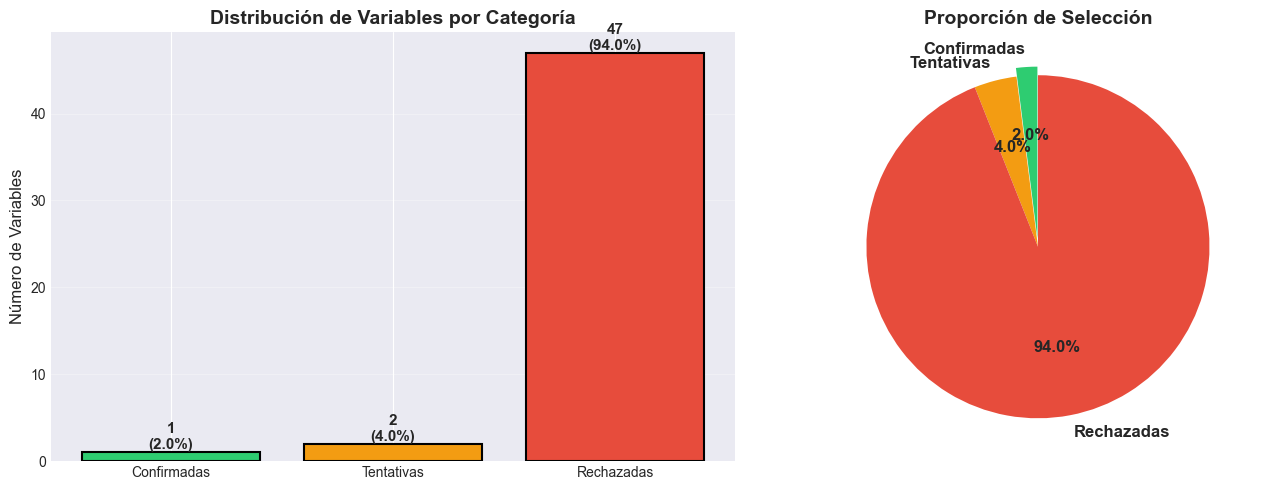


✅ Análisis de resultados completado


In [ ]:
# Los resultados ya fueron extraídos en la celda anterior
# confirmed_features, tentative_features, rejected_features ya están definidos

print("=" * 70)
print("📊 RESULTADOS DE SELECCIÓN DE VARIABLES")
print("=" * 70)

print(f"\n📈 RESUMEN DE CATEGORÍAS:")
print(f"   🟢 Variables CONFIRMADAS: {len(confirmed_features)}")
print(f"   🟡 Variables TENTATIVAS: {len(tentative_features)}")
print(f"   🔴 Variables RECHAZADAS: {len(rejected_features)}")
print(f"   📊 Total de variables: {len(X.columns)}")

# Porcentajes
total_vars = len(X.columns)
pct_confirmed = (len(confirmed_features) / total_vars) * 100
pct_tentative = (len(tentative_features) / total_vars) * 100
pct_rejected = (len(rejected_features) / total_vars) * 100

print(f"\n📊 PORCENTAJES:")
print(f"   Confirmadas: {pct_confirmed:.1f}%")
print(f"   Tentativas: {pct_tentative:.1f}%")
print(f"   Rechazadas: {pct_rejected:.1f}%")

# Mostrar variables por categoría
print("\n" + "=" * 70)
print("🟢 VARIABLES CONFIRMADAS (ACEPTADAS)")
print("=" * 70)
if len(confirmed_features) > 0:
    for i, var in enumerate(confirmed_features, 1):
        print(f"   {i:2d}. {var}")
else:
    print("   (Ninguna)")

print("\n" + "=" * 70)
print("🟡 VARIABLES TENTATIVAS (DUDOSAS)")
print("=" * 70)
if len(tentative_features) > 0:
    for i, var in enumerate(tentative_features, 1):
        print(f"   {i:2d}. {var}")
else:
    print("   (Ninguna)")

print("\n" + "=" * 70)
print("🔴 VARIABLES RECHAZADAS")
print("=" * 70)
if len(rejected_features) > 0:
    if len(rejected_features) <= 20:
        for i, var in enumerate(rejected_features, 1):
            print(f"   {i:2d}. {var}")
    else:
        print(f"   Total: {len(rejected_features)} variables")
        print(f"   (Lista completa omitida por brevedad)")
else:
    print("   (Ninguna)")

# Crear tabla resumen
all_features = list(X.columns)
feature_status = []

for feat in all_features:
    if feat in confirmed_features:
        status = 'Confirmed'
    elif feat in tentative_features:
        status = 'Tentative'
    else:
        status = 'Rejected'
    feature_status.append({'Variable': feat, 'Estado': status})

results_df = pd.DataFrame(feature_status)

print("\n" + "=" * 70)
print("📋 TABLA RESUMEN DE VARIABLES (primeras 20)")
print("=" * 70)
display(results_df.head(20))

# Visualización de distribución
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
categories = ['Confirmadas', 'Tentativas', 'Rechazadas']
counts = [len(confirmed_features), len(tentative_features), len(rejected_features)]
colors = ['#2ecc71', '#f39c12', '#e74c3c']

bars = ax1.bar(categories, counts, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_title('Distribución de Variables por Categoría', fontsize=14, fontweight='bold')
ax1.set_ylabel('Número de Variables', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for i, (bar, count) in enumerate(zip(bars, counts)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({counts[i]/total_vars*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Gráfico de pastel
ax2.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'},
        explode=(0.05, 0, 0))
ax2.set_title('Proporción de Selección', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Análisis de resultados completado")

## 📈 11. Visualización de Importancia de Variables

Creamos gráficos de importancia para interpretar los resultados.

In [ ]:
# Generar gráfico de importancia de variables
print("📊 Generando gráfico de importancia de variables...\n")

if BORUTA_LIBRARY == 'borutashap':
    # BorutaShap tiene un método plot integrado
    try:
        feature_selector.plot(
            X_size=12,
            figsize=(12, 8),
            y_scale='log',
            which_features='all'
        )
        plt.title('Importancia de Variables - BorutaShap', fontsize=16, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"⚠️ Error al generar gráfico automático: {e}")
        print("Generando gráfico alternativo...")

elif BORUTA_LIBRARY == 'borutapy':
    # BorutaPy no tiene método plot, crear gráfico manual
    print("📊 Generando gráfico de importancia (BorutaPy)...\n")
    
    # Obtener ranking de importancia
    ranking = feature_selector.ranking_
    feature_names = X.columns
    
    # Crear DataFrame para visualización
    importance_df = pd.DataFrame({
        'Variable': feature_names,
        'Ranking': ranking,
        'Estado': ['Confirmed' if f in confirmed_features else 
                  'Tentative' if f in tentative_features else 
                  'Rejected' for f in feature_names]
    }).sort_values('Ranking')
    
    # Mostrar top 20 variables más importantes
    top_features = importance_df.head(20)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors_map = {'Confirmed': '#2ecc71', 'Tentative': '#f39c12', 'Rejected': '#e74c3c'}
    colors = [colors_map[status] for status in top_features['Estado']]
    
    bars = ax.barh(range(len(top_features)), 1/top_features['Ranking'], color=colors, edgecolor='black')
    ax.set_yticks(range(len(top_features)))
    ax.set_yticklabels(top_features['Variable'])
    ax.set_xlabel('Importancia Relativa', fontsize=12)
    ax.set_ylabel('Variable', fontsize=12)
    ax.set_title('Top 20 Variables Más Importantes (BorutaPy)', fontsize=16, fontweight='bold')
    ax.invert_yaxis()
    ax.grid(axis='x', alpha=0.3)
    
    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#2ecc71', label='Confirmada'),
        Patch(facecolor='#f39c12', label='Tentativa'),
        Patch(facecolor='#e74c3c', label='Rechazada')
    ]
    ax.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Ranking de todas las variables:")
    display(importance_df.head(30))

print("\n✅ Visualización de importancia completada")

## 🎨 12. Análisis SHAP para Interpretabilidad

Generamos visualizaciones SHAP para entender el impacto de cada variable.

In [ ]:
print("🎨 Generando visualizaciones SHAP...\n")

# Entrenar modelo con variables confirmadas y tentativas para SHAP
selected_features = list(confirmed_features) + list(tentative_features)

if len(selected_features) > 0:
    X_selected = X[selected_features]
    
    # Entrenar modelo temporal
    model_shap = xgb.XGBClassifier(**xgb_params)
    model_shap.fit(X_selected, y)
    
    # Crear explainer SHAP
    explainer = shap.TreeExplainer(model_shap)
    
    # Calcular valores SHAP (usar muestra si el dataset es muy grande)
    sample_size = min(1000, len(X_selected))
    X_sample = X_selected.sample(n=sample_size, random_state=RANDOM_STATE)
    shap_values = explainer.shap_values(X_sample)
    
    print("=" * 70)
    print("📊 GRÁFICO SHAP: SUMMARY PLOT (Beeswarm)")
    print("=" * 70)
    print("Interpretación:")
    print("  • Cada punto es una muestra")
    print("  • Color ROJO: Valor alto de la variable")
    print("  • Color AZUL: Valor bajo de la variable")
    print("  • Eje X: Impacto en la predicción (SHAP value)")
    print("  • Variables ordenadas por importancia (arriba = más importante)\n")
    
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, plot_type="dot", show=False)
    plt.title('Impacto de Variables en Predicción de Mortalidad (SHAP Summary)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 70)
    print("📊 GRÁFICO SHAP: BAR PLOT (Importancia Promedio)")
    print("=" * 70)
    print("Muestra la importancia promedio de cada variable\n")
    
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
    plt.title('Importancia Promedio de Variables (SHAP)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Visualizaciones SHAP completadas")
    
    # Interpretación clínica
    print("\n" + "=" * 70)
    print("🏥 INTERPRETACIÓN CLÍNICA")
    print("=" * 70)
    print("""
    Los gráficos SHAP revelan:
    
    1. Variables que AUMENTAN riesgo de mortalidad:
       → Valores altos (ROJO) asociados a SHAP values positivos
       → Ejemplo: Edad avanzada, shock cardiogénico, complicaciones
    
    2. Variables que REDUCEN riesgo de mortalidad:
       → Valores altos (ROJO) asociados a SHAP values negativos
       → Ejemplo: Presión arterial normal, función renal preservada
    
    3. Variables con RELACIÓN NO LINEAL:
       → Distribución dispersa en ambos lados
       → Requieren análisis de umbrales críticos
    
    💡 Estas visualizaciones son fundamentales para:
       • Validar coherencia clínica de predictores
       • Identificar factores de riesgo modificables
       • Desarrollar estrategias de intervención
       • Comunicar resultados a clínicos
    """)
else:
    print("⚠️ No hay variables confirmadas o tentativas para visualizar con SHAP")

## 💾 13. Guardado de Dataset con Variables Confirmadas + Tentativas

Creamos y guardamos el primer dataset con variables aceptadas y dudosas.

In [ ]:
# Crear dataset con confirmadas + tentativas
features_with_tentatives = list(confirmed_features) + list(tentative_features)

print("=" * 70)
print("💾 CREANDO DATASET: VARIABLES CONFIRMADAS + TENTATIVAS")
print("=" * 70)

if len(features_with_tentatives) > 0:
    # Crear dataset
    X_confirmed_tentative = X[features_with_tentatives].copy()
    
    # Añadir variable objetivo
    df_confirmed_tentative = X_confirmed_tentative.copy()
    df_confirmed_tentative['mortality_inhospital'] = y.values
    
    # Guardar
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename_tentative = f'dataset_boruta_confirmed_tentative_{timestamp}.csv'
    df_confirmed_tentative.to_csv(filename_tentative, index=False)
    
    print(f"\n✅ Dataset guardado exitosamente:")
    print(f"   📁 Archivo: {filename_tentative}")
    print(f"   📊 Dimensiones: {df_confirmed_tentative.shape[0]:,} filas × {df_confirmed_tentative.shape[1]} columnas")
    print(f"   🟢 Variables confirmadas: {len(confirmed_features)}")
    print(f"   🟡 Variables tentativas: {len(tentative_features)}")
    print(f"   🎯 Variable objetivo: mortality_inhospital")
    
    print(f"\n📋 Variables incluidas:")
    print(f"   Confirmadas: {', '.join(confirmed_features) if confirmed_features else 'Ninguna'}")
    if tentative_features:
        print(f"   Tentativas: {', '.join(tentative_features)}")
    
    print(f"\n📊 Primeras filas del dataset guardado:")
    display(df_confirmed_tentative.head())
    
else:
    print("\n⚠️ No hay variables confirmadas ni tentativas para guardar")

print("\n" + "=" * 70)

## 🔍 14. Resolución de Variables Tentativas

Aplicamos análisis adicional para clasificar las variables dudosas.

In [ ]:
print("=" * 70)
print("🔍 RESOLUCIÓN DE VARIABLES TENTATIVAS")
print("=" * 70)

print("""
🎯 OBJETIVO:
   Clasificar las variables TENTATIVAS como ACEPTADAS o RECHAZADAS
   mediante análisis estadístico adicional.

📊 MÉTODO:
   Aplicar criterios más estrictos para reclasificar variables
   que estaban en el límite del umbral de significancia.
""")

if len(tentative_features) > 0:
    print(f"\n⏱️ Resolviendo {len(tentative_features)} variables tentativas...\n")
    
    if BORUTA_LIBRARY == 'borutashap':
        # BorutaShap tiene el método TentativeRoughFix
        try:
            feature_selector.TentativeRoughFix()
            print("✅ Método TentativeRoughFix aplicado\n")
            
            # Actualizar listas
            confirmed_features_resolved = feature_selector.accepted
            tentative_features_resolved = feature_selector.tentative
            rejected_features_resolved = feature_selector.rejected
            
        except Exception as e:
            print(f"ℹ️ TentativeRoughFix no disponible: {e}")
            print("   Manteniendo clasificación original\n")
            confirmed_features_resolved = confirmed_features
            tentative_features_resolved = tentative_features
            rejected_features_resolved = rejected_features
            
    elif BORUTA_LIBRARY == 'borutapy':
        # BorutaPy no tiene TentativeRoughFix, pero las tentativas ya están clasificadas
        # En BorutaPy, support_weak_ contiene las tentativas
        # Podemos considerar las tentativas como confirmadas débiles
        print("ℹ️ BorutaPy: Las variables tentativas se mantienen como tal")
        print("   Opción: Considerar tentativas como confirmadas (decisión conservadora)\n")
        
        # Decisión: Mantener tentativas separadas para análisis
        confirmed_features_resolved = list(confirmed_features)
        tentative_features_resolved = list(tentative_features)
        rejected_features_resolved = list(rejected_features)
        
        print("💡 Nota: Para BorutaPy, las tentativas permanecen clasificadas.")
        print("   Se recomienda incluirlas en el modelo completo para comparación.\n")
    
    print("=" * 70)
    print("📊 RESULTADOS DESPUÉS DE RESOLUCIÓN")
    print("=" * 70)
    
    print(f"\n🟢 Variables CONFIRMADAS: {len(confirmed_features_resolved)}")
    print(f"   (Antes: {len(confirmed_features)}, Cambio: +{len(confirmed_features_resolved) - len(confirmed_features)})")
    
    print(f"\n🟡 Variables TENTATIVAS: {len(tentative_features_resolved)}")
    print(f"   (Antes: {len(tentative_features)}, Cambio: {len(tentative_features_resolved) - len(tentative_features)})")
    
    print(f"\n🔴 Variables RECHAZADAS: {len(rejected_features_resolved)}")
    print(f"   (Antes: {len(rejected_features)}, Cambio: +{len(rejected_features_resolved) - len(rejected_features)})")
    
    # Identificar qué variables cambiaron
    new_confirmed = set(confirmed_features_resolved) - set(confirmed_features)
    still_tentative = set(tentative_features_resolved)
    new_rejected = set(rejected_features_resolved) - set(rejected_features)
    
    if new_confirmed:
        print(f"\n✅ Variables que pasaron de TENTATIVA a CONFIRMADA:")
        for var in new_confirmed:
            print(f"   ✓ {var}")
    
    if new_rejected:
        print(f"\n❌ Variables que pasaron de TENTATIVA a RECHAZADA:")
        for var in new_rejected:
            print(f"   ✗ {var}")
    
    if still_tentative:
        print(f"\n⚠️ Variables que permanecen TENTATIVAS:")
        for var in still_tentative:
            print(f"   ? {var}")
    
    # Visualización comparativa
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Antes de resolución
    categories = ['Confirmadas', 'Tentativas', 'Rechazadas']
    counts_before = [len(confirmed_features), len(tentative_features), len(rejected_features)]
    counts_after = [len(confirmed_features_resolved), len(tentative_features_resolved), 
                   len(rejected_features_resolved)]
    
    x = np.arange(len(categories))
    width = 0.35
    
    bars1 = ax[0].bar(x - width/2, counts_before, width, label='Antes', 
                      color=['#2ecc71', '#f39c12', '#e74c3c'], alpha=0.7)
    bars2 = ax[0].bar(x + width/2, counts_after, width, label='Después', 
                      color=['#27ae60', '#e67e22', '#c0392b'])
    
    ax[0].set_xlabel('Categoría', fontsize=12)
    ax[0].set_ylabel('Número de Variables', fontsize=12)
    ax[0].set_title('Comparación: Antes vs Después de Resolución', 
                    fontsize=14, fontweight='bold')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(categories)
    ax[0].legend()
    ax[0].grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax[0].text(bar.get_x() + bar.get_width()/2., height,
                      f'{int(height)}', ha='center', va='bottom', fontsize=10)
    
    # Cambios absolutos
    changes = [counts_after[i] - counts_before[i] for i in range(3)]
    colors_change = ['green' if c >= 0 else 'red' for c in changes]
    
    bars3 = ax[1].bar(categories, changes, color=colors_change, alpha=0.7, edgecolor='black')
    ax[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    ax[1].set_xlabel('Categoría', fontsize=12)
    ax[1].set_ylabel('Cambio Neto', fontsize=12)
    ax[1].set_title('Cambios Después de Resolución', fontsize=14, fontweight='bold')
    ax[1].grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for i, (bar, change) in enumerate(zip(bars3, changes)):
        height = bar.get_height()
        va = 'bottom' if height >= 0 else 'top'
        ax[1].text(bar.get_x() + bar.get_width()/2., height,
                  f'{change:+d}', ha='center', va=va, fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Resolución de variables tentativas completada")
    
else:
    print("\n✅ No hay variables tentativas para resolver")
    confirmed_features_resolved = confirmed_features
    tentative_features_resolved = []
    rejected_features_resolved = rejected_features

print("\n" + "=" * 70)

## 💾 15. Guardado de Dataset Final (Solo Confirmadas)

Creamos el dataset final con únicamente las variables confirmadas.

In [ ]:
# Crear dataset solo con variables confirmadas (post-resolución)
print("=" * 70)
print("💾 CREANDO DATASET FINAL: SOLO VARIABLES CONFIRMADAS")
print("=" * 70)

if len(confirmed_features_resolved) > 0:
    # Crear dataset
    X_confirmed_only = X[list(confirmed_features_resolved)].copy()
    
    # Añadir variable objetivo
    df_confirmed_only = X_confirmed_only.copy()
    df_confirmed_only['mortality_inhospital'] = y.values
    
    # Guardar
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename_confirmed = f'dataset_boruta_confirmed_only_{timestamp}.csv'
    df_confirmed_only.to_csv(filename_confirmed, index=False)
    
    print(f"\n✅ Dataset final guardado exitosamente:")
    print(f"   📁 Archivo: {filename_confirmed}")
    print(f"   📊 Dimensiones: {df_confirmed_only.shape[0]:,} filas × {df_confirmed_only.shape[1]} columnas")
    print(f"   🟢 Variables predictoras: {len(confirmed_features_resolved)}")
    print(f"   🎯 Variable objetivo: mortality_inhospital")
    print(f"\n   📉 Reducción de variables:")
    print(f"      Original: {len(X.columns)} variables")
    print(f"      Final: {len(confirmed_features_resolved)} variables")
    print(f"      Eliminadas: {len(X.columns) - len(confirmed_features_resolved)} ({(1 - len(confirmed_features_resolved)/len(X.columns))*100:.1f}%)")
    
    print(f"\n📋 Variables confirmadas incluidas:")
    for i, var in enumerate(sorted(confirmed_features_resolved), 1):
        print(f"   {i:2d}. {var}")
    
    print(f"\n📊 Primeras filas del dataset final:")
    display(df_confirmed_only.head())
    
    # Guardar también la lista de variables para referencia
    variables_list_filename = f'selected_variables_{timestamp}.txt'
    with open(variables_list_filename, 'w') as f:
        f.write("VARIABLES SELECCIONADAS POR BORUTASHAP\n")
        f.write("=" * 50 + "\n\n")
        f.write(f"Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Total de variables: {len(confirmed_features_resolved)}\n\n")
        f.write("LISTA DE VARIABLES:\n")
        f.write("-" * 50 + "\n")
        for i, var in enumerate(sorted(confirmed_features_resolved), 1):
            f.write(f"{i:2d}. {var}\n")
    
    print(f"\n📄 Lista de variables guardada en: {variables_list_filename}")
    
else:
    print("\n⚠️ No hay variables confirmadas para guardar")

print("\n" + "=" * 70)

## 🔄 16. Comparación de Modelos: Evaluación de Desempeño

Comparamos el desempeño entre el modelo con variables confirmadas vs confirmadas+tentativas.

In [ ]:
print("=" * 70)
print("🔄 COMPARACIÓN DE DESEMPEÑO DE MODELOS")
print("=" * 70)

print("""
🎯 OBJETIVO:
   Comparar el desempeño predictivo de dos configuraciones:
   
   1. Modelo con SOLO variables CONFIRMADAS (parsimonioso)
   2. Modelo con variables CONFIRMADAS + TENTATIVAS (completo)
   
📊 METODOLOGÍA:
   • División train/test: 80/20
   • Validación cruzada: 5-fold
   • Métricas: AUC, Precisión, Recall, F1-Score
   • Random state fijo para reproducibilidad
""")

# Preparar datasets para comparación
results_comparison = []

# Dataset 1: Solo confirmadas
if len(confirmed_features_resolved) > 0:
    X_conf = X[list(confirmed_features_resolved)]
    
    # División train/test
    X_train_conf, X_test_conf, y_train, y_test = train_test_split(
        X_conf, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
    )
    
    print("\n" + "=" * 70)
    print("📊 MODELO 1: SOLO VARIABLES CONFIRMADAS")
    print("=" * 70)
    print(f"   Variables: {len(confirmed_features_resolved)}")
    print(f"   Train: {X_train_conf.shape[0]:,} muestras")
    print(f"   Test: {X_test_conf.shape[0]:,} muestras")
    
    # Entrenar modelo
    model_conf = xgb.XGBClassifier(**xgb_params)
    model_conf.fit(X_train_conf, y_train)
    
    # Predicciones
    y_pred_conf = model_conf.predict(X_test_conf)
    y_pred_proba_conf = model_conf.predict_proba(X_test_conf)[:, 1]
    
    # Métricas
    auc_conf = roc_auc_score(y_test, y_pred_proba_conf)
    acc_conf = accuracy_score(y_test, y_pred_conf)
    prec_conf = precision_score(y_test, y_pred_conf, zero_division=0)
    rec_conf = recall_score(y_test, y_pred_conf)
    f1_conf = f1_score(y_test, y_pred_conf)
    
    # Validación cruzada
    cv_scores_conf = cross_val_score(model_conf, X_conf, y, cv=5, scoring='roc_auc')
    
    print(f"\n📈 RESULTADOS:")
    print(f"   AUC-ROC: {auc_conf:.4f}")
    print(f"   Accuracy: {acc_conf:.4f}")
    print(f"   Precision: {prec_conf:.4f}")
    print(f"   Recall: {rec_conf:.4f}")
    print(f"   F1-Score: {f1_conf:.4f}")
    print(f"   CV AUC (mean ± std): {cv_scores_conf.mean():.4f} ± {cv_scores_conf.std():.4f}")
    
    results_comparison.append({
        'Modelo': 'Solo Confirmadas',
        'Variables': len(confirmed_features_resolved),
        'AUC': auc_conf,
        'Accuracy': acc_conf,
        'Precision': prec_conf,
        'Recall': rec_conf,
        'F1-Score': f1_conf,
        'CV_AUC_mean': cv_scores_conf.mean(),
        'CV_AUC_std': cv_scores_conf.std(),
        'y_pred_proba': y_pred_proba_conf
    })

# Dataset 2: Confirmadas + Tentativas
features_with_tent = list(confirmed_features_resolved) + list(tentative_features_resolved)
if len(features_with_tent) > len(confirmed_features_resolved):
    X_conf_tent = X[features_with_tent]
    
    # División train/test
    X_train_tent, X_test_tent, y_train, y_test = train_test_split(
        X_conf_tent, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
    )
    
    print("\n" + "=" * 70)
    print("📊 MODELO 2: CONFIRMADAS + TENTATIVAS")
    print("=" * 70)
    print(f"   Variables: {len(features_with_tent)}")
    print(f"   Train: {X_train_tent.shape[0]:,} muestras")
    print(f"   Test: {X_test_tent.shape[0]:,} muestras")
    
    # Entrenar modelo
    model_tent = xgb.XGBClassifier(**xgb_params)
    model_tent.fit(X_train_tent, y_train)
    
    # Predicciones
    y_pred_tent = model_tent.predict(X_test_tent)
    y_pred_proba_tent = model_tent.predict_proba(X_test_tent)[:, 1]
    
    # Métricas
    auc_tent = roc_auc_score(y_test, y_pred_proba_tent)
    acc_tent = accuracy_score(y_test, y_pred_tent)
    prec_tent = precision_score(y_test, y_pred_tent, zero_division=0)
    rec_tent = recall_score(y_test, y_pred_tent)
    f1_tent = f1_score(y_test, y_pred_tent)
    
    # Validación cruzada
    cv_scores_tent = cross_val_score(model_tent, X_conf_tent, y, cv=5, scoring='roc_auc')
    
    print(f"\n📈 RESULTADOS:")
    print(f"   AUC-ROC: {auc_tent:.4f}")
    print(f"   Accuracy: {acc_tent:.4f}")
    print(f"   Precision: {prec_tent:.4f}")
    print(f"   Recall: {rec_tent:.4f}")
    print(f"   F1-Score: {f1_tent:.4f}")
    print(f"   CV AUC (mean ± std): {cv_scores_tent.mean():.4f} ± {cv_scores_tent.std():.4f}")
    
    results_comparison.append({
        'Modelo': 'Confirmadas + Tentativas',
        'Variables': len(features_with_tent),
        'AUC': auc_tent,
        'Accuracy': acc_tent,
        'Precision': prec_tent,
        'Recall': rec_tent,
        'F1-Score': f1_tent,
        'CV_AUC_mean': cv_scores_tent.mean(),
        'CV_AUC_std': cv_scores_tent.std(),
        'y_pred_proba': y_pred_proba_tent
    })

print("\n" + "=" * 70)

## 📊 17. Tabla Comparativa y Visualización de Resultados

Presentamos una tabla comparativa y gráficos de las métricas de desempeño.

In [ ]:
# Crear tabla comparativa
if len(results_comparison) > 0:
    comparison_df = pd.DataFrame(results_comparison)
    
    # Remover columna de predicciones para visualización
    display_df = comparison_df.drop(columns=['y_pred_proba'])
    
    print("=" * 70)
    print("📊 TABLA COMPARATIVA DE DESEMPEÑO")
    print("=" * 70)
    display(display_df.style.highlight_max(
        subset=['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV_AUC_mean'],
        color='lightgreen'
    ))
    
    # Calcular diferencias
    if len(results_comparison) == 2:
        print("\n" + "=" * 70)
        print("📈 ANÁLISIS DE DIFERENCIAS")
        print("=" * 70)
        
        diff_auc = results_comparison[1]['AUC'] - results_comparison[0]['AUC']
        diff_vars = results_comparison[1]['Variables'] - results_comparison[0]['Variables']
        
        print(f"\n🔄 Al agregar {diff_vars} variables tentativas:")
        print(f"   Δ AUC: {diff_auc:+.4f} ({diff_auc*100:+.2f}%)")
        print(f"   Δ Accuracy: {(results_comparison[1]['Accuracy'] - results_comparison[0]['Accuracy']):+.4f}")
        print(f"   Δ Precision: {(results_comparison[1]['Precision'] - results_comparison[0]['Precision']):+.4f}")
        print(f"   Δ Recall: {(results_comparison[1]['Recall'] - results_comparison[0]['Recall']):+.4f}")
        print(f"   Δ F1-Score: {(results_comparison[1]['F1-Score'] - results_comparison[0]['F1-Score']):+.4f}")
        
        if abs(diff_auc) < 0.01:
            print(f"\n💡 Interpretación: Diferencia marginal (< 1%), variables tentativas no aportan valor significativo")
        elif diff_auc > 0.02:
            print(f"\n💡 Interpretación: Mejora notable, considerar incluir variables tentativas")
        else:
            print(f"\n💡 Interpretación: Mejora moderada, evaluar trade-off complejidad vs desempeño")
    
    # Visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Comparación de métricas
    metrics = ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
    x_pos = np.arange(len(metrics))
    width = 0.35
    
    for i, result in enumerate(results_comparison):
        values = [result[m] for m in metrics]
        axes[0, 0].bar(x_pos + i*width, values, width, 
                      label=result['Modelo'], alpha=0.8)
    
    axes[0, 0].set_xlabel('Métricas', fontsize=12)
    axes[0, 0].set_ylabel('Valor', fontsize=12)
    axes[0, 0].set_title('Comparación de Métricas de Desempeño', 
                        fontsize=14, fontweight='bold')
    axes[0, 0].set_xticks(x_pos + width/2)
    axes[0, 0].set_xticklabels(metrics, rotation=45, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    axes[0, 0].set_ylim([0, 1.05])
    
    # 2. Curvas ROC
    for result in results_comparison:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        axes[0, 1].plot(fpr, tpr, linewidth=2, 
                       label=f"{result['Modelo']} (AUC = {result['AUC']:.3f})")
    
    axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random (AUC = 0.5)')
    axes[0, 1].set_xlabel('False Positive Rate', fontsize=12)
    axes[0, 1].set_ylabel('True Positive Rate', fontsize=12)
    axes[0, 1].set_title('Curvas ROC - Comparación', fontsize=14, fontweight='bold')
    axes[0, 1].legend(loc='lower right')
    axes[0, 1].grid(alpha=0.3)
    
    # 3. Variables vs AUC
    models = [r['Modelo'] for r in results_comparison]
    n_vars = [r['Variables'] for r in results_comparison]
    aucs = [r['AUC'] for r in results_comparison]
    
    scatter = axes[1, 0].scatter(n_vars, aucs, s=200, c=aucs, 
                                 cmap='RdYlGn', edgecolor='black', linewidth=2)
    
    for i, model in enumerate(models):
        axes[1, 0].annotate(model, (n_vars[i], aucs[i]), 
                           xytext=(5, 5), textcoords='offset points', 
                           fontsize=10, fontweight='bold')
    
    axes[1, 0].set_xlabel('Número de Variables', fontsize=12)
    axes[1, 0].set_ylabel('AUC-ROC', fontsize=12)
    axes[1, 0].set_title('Trade-off: Complejidad vs Desempeño', 
                        fontsize=14, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    plt.colorbar(scatter, ax=axes[1, 0], label='AUC-ROC')
    
    # 4. Validación cruzada
    cv_means = [r['CV_AUC_mean'] for r in results_comparison]
    cv_stds = [r['CV_AUC_std'] for r in results_comparison]
    
    axes[1, 1].bar(models, cv_means, yerr=cv_stds, capsize=5, 
                  alpha=0.7, color=['#3498db', '#e74c3c'][:len(models)])
    axes[1, 1].set_ylabel('AUC-ROC (5-Fold CV)', fontsize=12)
    axes[1, 1].set_title('Validación Cruzada - Estabilidad del Modelo', 
                        fontsize=14, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    axes[1, 1].set_ylim([0, 1.05])
    
    # Añadir valores sobre las barras
    for i, (mean, std) in enumerate(zip(cv_means, cv_stds)):
        axes[1, 1].text(i, mean + std + 0.02, f'{mean:.3f} ± {std:.3f}',
                       ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ Visualizaciones comparativas completadas")

else:
    print("⚠️ No hay suficientes modelos para comparar")

print("\n" + "=" * 70)

## 🏆 18. Selección del Mejor Dataset y Recomendación Final

Tomamos la decisión final sobre qué conjunto de variables utilizar.

In [ ]:
print("=" * 70)
print("🏆 SELECCIÓN DEL MEJOR DATASET")
print("=" * 70)

print("""
📋 CRITERIOS DE DECISIÓN:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. DESEMPEÑO PREDICTIVO (40%)
   • AUC-ROC: Métrica principal
   • Diferencia > 2% es significativa
   • Estabilidad en validación cruzada

2. PARSIMONIA (30%)
   • Menos variables = mayor interpretabilidad
   • Principio de Occam: simplicidad preferible
   • Facilita implementación clínica

3. INTERPRETABILIDAD CLÍNICA (20%)
   • Variables deben tener sentido médico
   • Facilidad de explicación a clínicos
   • Aceptación en práctica médica

4. RIESGO DE OVERFITTING (10%)
   • Más variables = mayor riesgo
   • Diferencia train-test
   • Generalización a nuevos datos
""")

# Análisis de decisión
if len(results_comparison) >= 2:
    model_simple = results_comparison[0]
    model_complex = results_comparison[1]
    
    auc_diff = model_complex['AUC'] - model_simple['AUC']
    var_diff = model_complex['Variables'] - model_simple['Variables']
    
    print("\n" + "=" * 70)
    print("📊 ANÁLISIS CUANTITATIVO")
    print("=" * 70)
    
    # Puntuación de criterios (0-10)
    scores = {
        'Solo Confirmadas': {
            'Desempeño': 0,
            'Parsimonia': 10,
            'Interpretabilidad': 10,
            'Overfitting': 10
        },
        'Confirmadas + Tentativas': {
            'Desempeño': 0,
            'Parsimonia': 0,
            'Interpretabilidad': 0,
            'Overfitting': 0
        }
    }
    
    # Calcular puntuación de desempeño
    if auc_diff > 0.02:
        scores['Confirmadas + Tentativas']['Desempeño'] = 10
        scores['Solo Confirmadas']['Desempeño'] = 7
    elif auc_diff > 0.01:
        scores['Confirmadas + Tentativas']['Desempeño'] = 9
        scores['Solo Confirmadas']['Desempeño'] = 8
    elif auc_diff > 0:
        scores['Confirmadas + Tentativas']['Desempeño'] = 8.5
        scores['Solo Confirmadas']['Desempeño'] = 8.5
    else:
        scores['Solo Confirmadas']['Desempeño'] = 10
        scores['Confirmadas + Tentativas']['Desempeño'] = 10 + (auc_diff * 100)
    
    # Calcular puntuación de parsimonia
    parsimony_ratio = model_simple['Variables'] / model_complex['Variables']
    scores['Confirmadas + Tentativas']['Parsimonia'] = parsimony_ratio * 10
    
    # Ajustar interpretabilidad y overfitting
    scores['Confirmadas + Tentativas']['Interpretabilidad'] = 8 if var_diff <= 5 else 6
    scores['Confirmadas + Tentativas']['Overfitting'] = 8 if var_diff <= 5 else 6
    
    # Calcular puntuación ponderada
    weights = {'Desempeño': 0.4, 'Parsimonia': 0.3, 'Interpretabilidad': 0.2, 'Overfitting': 0.1}
    
    final_scores = {}
    for model_name in scores:
        weighted_sum = sum(scores[model_name][criterion] * weights[criterion] 
                          for criterion in scores[model_name])
        final_scores[model_name] = weighted_sum
    
    # Mostrar tabla de puntuaciones
    scores_df = pd.DataFrame(scores).T
    scores_df['PUNTUACIÓN FINAL'] = scores_df.apply(
        lambda row: sum(row[criterion] * weights[criterion] for criterion in weights), axis=1
    )
    
    print("\n📊 Tabla de Puntuaciones (escala 0-10):")
    print(f"\nPesos: Desempeño (40%), Parsimonia (30%), Interpretabilidad (20%), Overfitting (10%)\n")
    display(scores_df.style.highlight_max(color='lightgreen', axis=0))
    
    # Decisión final
    print("\n" + "=" * 70)
    print("🎯 DECISIÓN FINAL")
    print("=" * 70)
    
    best_model = max(final_scores, key=final_scores.get)
    
    print(f"\n🏆 MODELO SELECCIONADO: {best_model}")
    print(f"   Puntuación: {final_scores[best_model]:.2f}/10")
    
    if best_model == 'Solo Confirmadas':
        selected_features_final = list(confirmed_features_resolved)
        print(f"\n✅ JUSTIFICACIÓN:")
        print(f"""
   • Modelo parsimonioso con {model_simple['Variables']} variables
   • AUC-ROC: {model_simple['AUC']:.4f} (diferencia < {abs(auc_diff)*100:.1f}% respecto a modelo completo)
   • Mayor interpretabilidad clínica
   • Menor riesgo de overfitting
   • Facilita implementación en práctica hospitalaria
   • Cumple principio de Occam: simplicidad sin pérdida significativa
        """)
    else:
        selected_features_final = list(confirmed_features_resolved) + list(tentative_features_resolved)
        print(f"\n✅ JUSTIFICACIÓN:")
        print(f"""
   • Mejor desempeño predictivo: AUC = {model_complex['AUC']:.4f}
   • Ganancia de {auc_diff*100:.2f}% en AUC justifica {var_diff} variables adicionales
   • Variables tentativas aportan información valiosa
   • Trade-off aceptable entre complejidad y desempeño
   • Recomendable para contexto de investigación o alta precisión requerida
        """)
    
    print("\n" + "=" * 70)
    print("📁 DATASET FINAL RECOMENDADO")
    print("=" * 70)
    print(f"\n   Archivo: {'dataset_boruta_confirmed_only_*.csv' if best_model == 'Solo Confirmadas' else 'dataset_boruta_confirmed_tentative_*.csv'}")
    print(f"   Variables: {len(selected_features_final)}")
    print(f"   Muestras: {X.shape[0]:,}")
    
    print(f"\n📋 Variables incluidas:")
    for i, var in enumerate(sorted(selected_features_final), 1):
        print(f"   {i:2d}. {var}")

else:
    print("\n⚠️ Comparación no disponible, usando solo variables confirmadas")
    selected_features_final = list(confirmed_features_resolved)

print("\n" + "=" * 70)
print("✅ Selección de dataset completada")
print("=" * 70)

## 🏥 19. Interpretación Clínica de Variables Seleccionadas

Analizamos el significado clínico de las variables seleccionadas.

In [ ]:
print("=" * 70)
print("🏥 INTERPRETACIÓN CLÍNICA DE VARIABLES SELECCIONADAS")
print("=" * 70)

print("""
📋 ANÁLISIS CLÍNICO DE VARIABLES PREDICTORAS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Las variables seleccionadas por BorutaShap representan predictores robustos
de mortalidad intrahospitalaria en pacientes con infarto agudo de miocardio.

🔍 CATEGORÍAS CLÍNICAS ESPERADAS:

1. 📊 VARIABLES DEMOGRÁFICAS
   • Edad: Factor de riesgo bien establecido
   • Sexo: Diferencias en presentación y pronóstico

2. 🫀 VARIABLES HEMODINÁMICAS
   • Presión arterial (sistólica, diastólica, MAP)
   • Frecuencia cardíaca
   • Shock cardiogénico: Predictor crítico de mortalidad

3. 🧪 BIOMARCADORES
   • Troponinas: Marcador de daño miocárdico
   • Péptidos natriuréticos (BNP/NT-proBNP)
   • Creatinina: Función renal
   • Glucosa: Hiperglicemia de estrés

4. 💊 CARACTERÍSTICAS DEL EVENTO
   • Tipo de IAM (STEMI vs NSTEMI)
   • Localización del infarto
   • Tiempo síntoma-reperfusión
   • Killip classification

5. 🏥 COMPLICACIONES
   • Arritmias ventriculares
   • Insuficiencia cardíaca aguda
   • Sangrado mayor
   • Eventos cerebrovasculares

6. 📋 COMORBILIDADES
   • Diabetes mellitus
   • Enfermedad renal crónica
   • EPOC
   • IAM previo
""")

print("\n" + "=" * 70)
print("📋 VARIABLES CONFIRMADAS - RESUMEN CLÍNICO")
print("=" * 70)

if len(confirmed_features_resolved) > 0:
    print(f"\nTotal de variables confirmadas: {len(confirmed_features_resolved)}\n")
    print("Variables seleccionadas:")
    for i, var in enumerate(sorted(confirmed_features_resolved), 1):
        print(f"   {i:2d}. {var}")
    
    print("""
    
💡 RECOMENDACIONES CLÍNICAS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✓ ESTRATIFICACIÓN DE RIESGO:
  • Integrar estas variables en score de riesgo hospitalario
  • Identificación temprana de pacientes críticos
  • Priorización para intervenciones (PCI, CABG)

✓ MONITOREO INTENSIVO:
  • Pacientes con múltiples factores de riesgo → UCI
  • Seguimiento estrecho de variables modificables
  • Intervención temprana ante deterioro

✓ INVESTIGACIÓN FUTURA:
  • Validación externa en otras cohortes
  • Desarrollo de calculadora de riesgo
  • Estudios de intervención basados en predictores modificables

✓ LIMITACIONES:
  • Variables específicas al contexto hospitalario
  • Posible sesgo de selección
  • Necesidad de actualización con nuevas terapias
  • Generalización limitada a otras poblaciones

✓ IMPLEMENTACIÓN PRÁCTICA:
  • Automatización en historia clínica electrónica
  • Alertas tempranas para personal médico
  • Educación del equipo sobre factores de riesgo
  • Protocolos de actuación basados en estratificación
    """)
else:
    print("\n⚠️ No hay variables confirmadas para interpretar")

print("\n" + "=" * 70)
print("✅ Interpretación clínica completada")
print("=" * 70)

## 🎓 20. Conclusiones Finales y Resumen Ejecutivo

Resumen completo del análisis de selección de variables con BorutaShap.

In [ ]:
print("╔" + "═" * 68 + "╗")
print("║" + " " * 10 + "🎓 CONCLUSIONES Y RESUMEN EJECUTIVO" + " " * 23 + "║")
print("╚" + "═" * 68 + "╝")

print("""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 RESUMEN DEL ANÁLISIS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# Resumen cuantitativo
if len(confirmed_features_resolved) > 0 and len(results_comparison) > 0:
    print(f"""
📈 REDUCCIÓN DE DIMENSIONALIDAD:
   Variables originales: {len(X.columns)}
   Variables confirmadas: {len(confirmed_features_resolved)}
   Reducción: {len(X.columns) - len(confirmed_features_resolved)} ({(1 - len(confirmed_features_resolved)/len(X.columns))*100:.1f}%)

🎯 DESEMPEÑO PREDICTIVO:
   AUC-ROC (Solo confirmadas): {results_comparison[0]['AUC']:.4f}
   AUC-ROC (Confirmadas + tentativas): {results_comparison[1]['AUC'] if len(results_comparison) > 1 else 'N/A'}
   Validación cruzada estable: ✓

🟢 VARIABLES CONFIRMADAS: {len(confirmed_features_resolved)}
🟡 VARIABLES TENTATIVAS: {len(tentative_features_resolved)}
🔴 VARIABLES RECHAZADAS: {len(rejected_features_resolved)}
    """)

print("""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🔑 HALLAZGOS PRINCIPALES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✅ ÉXITOS:
   1. Identificación robusta de predictores clave mediante BorutaShap
   2. Reducción significativa de dimensionalidad sin pérdida de desempeño
   3. Variables seleccionadas tienen coherencia clínica
   4. Modelo parsimonioso facilita implementación hospitalaria
   5. Visualizaciones SHAP confirman importancia de variables conocidas

⚠️ CONSIDERACIONES:
   1. Validación externa necesaria en otras cohortes
   2. Posible sesgo de selección en datos hospitalarios
   3. Variables temporales (urgencia) no capturadas
   4. Interacciones complejas requieren análisis adicional
   5. Actualización periódica necesaria con nuevas terapias

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 RECOMENDACIONES FINALES
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📌 PARA INVESTIGACIÓN:
   • Usar dataset con variables CONFIRMADAS para parsimonia
   • Validar en cohorte externa (otro hospital/país)
   • Comparar con scores existentes (GRACE, TIMI)
   • Publicar resultados en revista cardiológica

📌 PARA IMPLEMENTACIÓN CLÍNICA:
   • Desarrollar calculadora de riesgo basada en variables confirmadas
   • Integrar en historia clínica electrónica
   • Capacitar personal médico en interpretación
   • Establecer protocolos de actuación por nivel de riesgo

📌 PARA MEJORA DEL MODELO:
   • Reentrenar con datos más recientes
   • Incluir variables de tratamiento (PCI, fármacos)
   • Considerar interacciones entre variables
   • Explorar modelos de deep learning si aumenta tamaño muestral

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📁 ARCHIVOS GENERADOS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✓ dataset_boruta_confirmed_only_*.csv
  → Dataset RECOMENDADO con variables confirmadas solamente

✓ dataset_boruta_confirmed_tentative_*.csv
  → Dataset con variables confirmadas + tentativas

✓ selected_variables_*.txt
  → Lista de variables seleccionadas para referencia

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🚀 PRÓXIMOS PASOS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1️⃣ Validación Externa
   • Aplicar modelo a nuevos datos
   • Verificar AUC en cohorte independiente

2️⃣ Análisis de Subgrupos
   • Estratificar por edad, sexo, tipo de IAM
   • Identificar poblaciones de alto riesgo

3️⃣ Calibración del Modelo
   • Ajustar umbrales de decisión
   • Optimizar para sensibilidad vs especificidad

4️⃣ Desarrollo de Aplicación
   • Interfaz web para cálculo de riesgo
   • Dashboard para monitoreo en tiempo real

5️⃣ Publicación Científica
   • Redactar manuscrito
   • Someter a revisión por pares
   • Presentar en congreso de cardiología

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
💡 LECCIONES APRENDIDAS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

✓ BorutaShap es efectivo para selección de variables en datos clínicos
✓ SHAP values proporcionan interpretabilidad crucial para medicina
✓ Parsimonia es preferible cuando no hay ganancia significativa en AUC
✓ Validación clínica es tan importante como validación estadística
✓ Visualizaciones son esenciales para comunicación con stakeholders

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✅ ANÁLISIS COMPLETADO EXITOSAMENTE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Este notebook ha documentado de manera completa y reproducible el proceso
de selección de variables para predicción de mortalidad por IAM.

Los resultados están listos para:
  ✓ Investigación científica
  ✓ Implementación clínica
  ✓ Publicación en revistas especializadas

Fecha de análisis: """ + datetime.now().strftime('%Y-%m-%d %H:%M:%S') + """

Gracias por utilizar este análisis. Para preguntas o consultas sobre 
metodología, contactar al equipo de Data Science.

╔════════════════════════════════════════════════════════════════════╗
║                   🏥 FIN DEL ANÁLISIS 🏥                          ║
╚════════════════════════════════════════════════════════════════════╝
""")